## Basics of Greedy Algorithms

A greedy algorithm, as the name suggests, always makes the choice that seems to be the best at that moment. This means that it makes a locally-optimal choice in the hope that this choice will lead to a globally-optimal solution.

Assume that you have an objective function that needs to be optimized (either maximized or minimized) at a given point. A Greedy algorithm makes greedy choices at each step to ensure that the objective function is optimized. The Greedy algorithm has only *one shot* to compute the optimal solution so that it *never goes back* and reverses the decision.


Greedy algorithms have some advantages and disadvantages:

- It is quite easy to come up with a greedy algorithm (or even multiple greedy algorithms) for a problem.
- Analyzing the run time for greedy algorithms will generally be much easier than for other techniques.
- The difficult part is that for greedy algorithms you have to work much harder to prove the algorithm is optimal.


### A busy student

Being a very busy student, Alice has exactly **T** hours to do some assignment questions and she wants to do maximum the number of assignment questions can be done.

You are given an array **A** of integers, where each element indicates the time a question takes for completion. You want to calculate the maximum number of question that Alice can do in the limited time that you have.

This is a simple Greedy-algorithm problem. In each iteration, you have to greedily select a question which will take the minimum amount of time to complete.

- Sort the array A in an ascending order.
- Iterate the numbers in A.
    - if there is enough time to do this question:
        - update the question_counter
        - update the time has passed
    - if not, break the loop (the next question will take even more time)


In [1]:
# sample of sorting a list into ascending order
lst = [5,1,2,1,8]
lst.sort()
lst

[1, 1, 2, 5, 8]

In [2]:
def num_questions_can_do(A,T):
    """
    param A: a list of integers for the number of hours to finish one questions
    param T: an integer of hours that Alice has to do those questions
    return: an integer of the maximum number of questions Alice can do with time T
    """
    current_time = 0
    question_counter = 0
    #A.sort()
    for i in A:
        if current_time + i <=T:
            question_counter += 1
            current_time += i
        else: break
    return question_counter

# test case 1
num_questions_can_do([5,1,2,1,8],10)  # 4

4

In [3]:
# test case 2
num_questions_can_do([5,1,2,1,8],100)  # 5

5

In [4]:
# test case 3
num_questions_can_do([5,1,2,1,8],0)  # 0

0

### Discussion:

**Does this algorithm always produce the optimal solution?**

In this case, yes!

**What is the time complexity if A is unsorted?**

Current_time = 0 -> primitive step, constant time
Question_counter=0 -> primitive step, constant time
A.sort -> Nlog(n) 
For I in A (iteration) -> total of N rounds
Within iteration: nothing special, O(n) time

c+c+nlogn *n +o(n)

Highest one: O(nlog(n))

**What is the time complexity if A is sorted?**

Time complexity O(N)

Point: Greedy algorithm- greedy algorithm analyzing is easy. 

## Exercise: Tacing down a number pyramid

Given the number pyramid below:
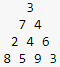

You are required to find a trace from the top of the pyramid to the bottom which will produce the **maximum** sum of all the numbers on the trace. As you move down the pyramid, you can only move to adjacent numbers on the row below.

The trace which produces the maximum of the sume should be 3 - 7 - 4 - 9. The sum is 23.


You can assume that there are not two numbers on the sames row have the same value next to each other.

Please try to provide a greedy solution of this problem first:

In [5]:
def max_sum_of_trace(pyramid):
    """
    param: pyramid, a list of lists of numbers. The sublist with index i has
    i+1 number(s), for example [[1],[2,3],[4,5,6]]
    return: the maximum of the numbers on a trace with a greedy algorithm
    """
    sum = pyramid[0][0]
    current_index = 0
    
    for line_index in range(1,len(pyramid)): #iterate through each line starting at line below top, go to end of pyramid
        if pyramid[line_index][current_index]>pyramid[line_index][current_index+1]:#for the row, is current index bigger than next
            sum +=pyramid[line_index][current_index] #if current bigger, add this number
        else:
            sum +=pyramid[line_index][current_index+1] #if next one bigger, add that number
            current_index += 1 #increase the index within that row - can only go adjacent from here
    return sum
max_sum_of_trace([[3],[7,4],[2,4,6],[8,5,9,3]])

23

### Discussion:

**What is the time complexity of this greedy solution?**

O(n), n is the height of the pyramid. For each level of the pyramid, we only visit two values to decide which way to move down. 

**Does this greedy algorithm always give us optimal solution for this question? Any cases it does not?**
 
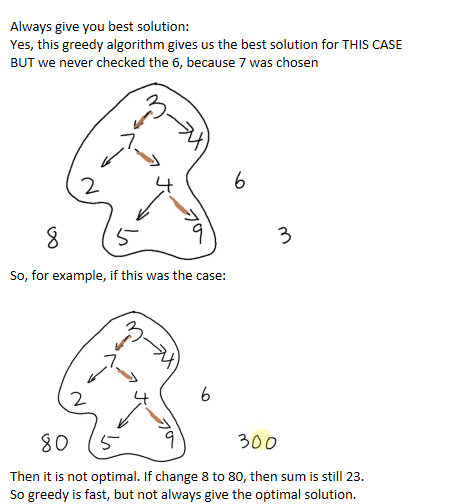


In [6]:
# a case that the greedy approach does not provide optimal solution
max_sum_of_trace([[3],[7,4],[2,4,6],[80,5,9,3]])

23

What is the "brute force" way to find the maximum of the sum of a trace? What the time complexity does the "brute force" approach have? (or, how many combinations we need to try?)

<font color='red'>O( 2^(n-1) ).  If the height of the pyramid is 2, there are 2 possible traces. If the height is 3, their are 4 possible traces. If the heigher is 4, there are 8 possible traces.</font>  

	
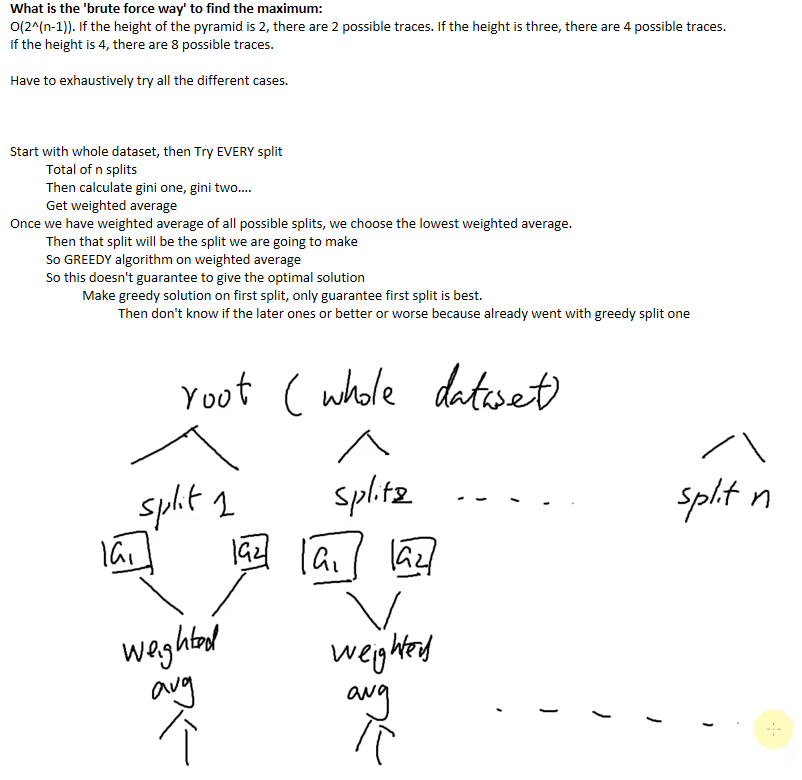

## CART Training ALgorithm:
Scikit-Learn  uses  the  Classification  And  Regression  Tree  (CART)  algorithm  to  train
Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk  (e.g., “petal length ≤ 2.45 cm”). How does it choose k and tk ? It searches for the
pair (k, tk ) that produces the purest subsets (weighted by their size). 

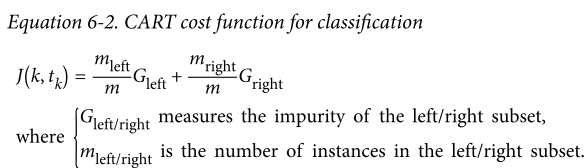

As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.

## To sum up
- A greedy algorithm makes greedy choices at each step
    - easy to code
    - lower complexity
- A greedy algorithm may not produce the optimal solution, be very careful...
- **The CART Training Algorithm is a greedy algorithm**
    - so we may not have an optimal decision tree...
    - how to fix this: building an optimal tree is np-hard, but we don't have to...
        - random forest
        - 
       

### Further question:

Can you create a better solution which guaranttees to find a trace down a number pyramid with largest sum? What is the complexity of your solution? (I can do a n^2 algorithm, n is the hight of the pyramid)

Let me know if you have found a solution!

In [ ]:
    sum = pyramid[0][0]
    current_index = 0
    
    for line_index in range(1,len(pyramid)): #iterate through each line starting at line below top, go to end of pyramid
        if pyramid[line_index][current_index]>pyramid[line_index][current_index+1]:#for the row, is current index bigger than next
            sum +=pyramid[line_index][current_index] #if current bigger, add this number
        else:
            sum +=pyramid[line_index][current_index+1] #if next one bigger, add that number
            current_index += 1 #increase the index within that row - can only go adjacent from here
    return sum
max_sum_of_trace([[3],[7,4],[2,4,6],[8,5,9,3]])

In [ ]:
def corrected_max_sum_of_trace(pyramid):
    """
    param: pyramid, a list of lists of numbers. The sublist with index i has
    i+1 number(s), for example [[1],[2,3],[4,5,6]]
    return: the maximum of the numbers on a trace with a greedy algorithm
    """
    sum=pyramid[-1][-1] #start at the row, last index
    current_index=0
    last=pyramid[-1][-1]
    
    for line_index in range(len(pyramid),-1):
        
    
    
    
corrected_max_sum_of_trace([[3],[7,4],[2,4,6],[80,5,9,3]]) # 92

In [18]:

'''
#NOT THIS ONE
def corrected_max_sum_of_trace(pyramid): 
    """
    param: pyramid, a list of lists of numbers. The sublist with index i has
    i+1 number(s), for example [[1],[2,3],[4,5,6]]
    return: the maximum of the numbers on a trace with a greedy algorithm
    """
    
    #r is the number of rows in the pyramid
    r=len(pyramid)
    
    #the top three numbers can go ahead and be added together
    if r > 1: 
        pyramid[1][1] = pyramid[1][1]+pyramid[0][0] #the top number can go ahead and be added to the row two, index 1 (right)
        pyramid[1][0] = pyramid[1][0]+pyramid[0][0] #the top number can go ahead and be added to the row two, index zero (left)
  
    #Go through remaining rows
    for i in range(2, r): 
        pyramid[i][0] = pyramid[i][0] + pyramid[i-1][0] 
        pyramid[i][i] = pyramid[i][i] + pyramid[i-1][i-1] 
  
        # Go through the columns
        for j in range(1, i): 
  
            # Take greater of directly below and directly below/to the right
  
            # pyramid[i] stores the sums of the the possible combinations/paths
            if pyramid[i][j]+pyramid[i-1][j-1] >= pyramid[i][j]+pyramid[i-1][j]: 
                pyramid[i][j] = pyramid[i][j] + pyramid[i-1][j-1] 
            else: 
                pyramid[i][j] = pyramid[i][j]+pyramid[i-1][j] 
    
    print(max(pyramid[r-1]))
    '''

In [43]:
def corrected_max_sum_of_trace(pyramid): 
        """
    param: pyramid, a list of lists of numbers. The sublist with index i has
    i+1 number(s), for example [[1],[2,3],[4,5,6]]
    return: the maximum of the numbers on a trace with 
    """
    num_rows=(len(pyramid)-1)
    
    #Start at bottom row, iterate up
    for row_index in range(num_rows-1, -1, -1): 
        for col_index in range(row_index+1): 
            
            if (pyramid[row_index+1][col_index] > pyramid[row_index+1][col_index+1]): #for this row, is current index bigger than next
                pyramid[row_index][col_index] += pyramid[row_index+1][col_index] #if if current bigger, add this number
            else: 
                pyramid[row_index][col_index] += pyramid[row_index+1][col_index+1] #if next one bigger, add that number
  
    # return maximum sum 
    return pyramid[0][0] 

In [44]:
corrected_max_sum_of_trace([[3],[7,4],[2,4,6],[80,5,9,3]])

92